# Project 1

## Introduce the problem

### What is the problem you are trying to solve?

##### Crime in the United States.

In [168]:
# !pip install xlrd

# dependencies
import pandas as pd

In [169]:
crime_data = pd.read_excel(r"C:\Users\cesth\Downloads\table-1.xls")

# Drop rows 0 and 1 since they are of no use
rows_to_drop = [0, 1]
crime_data = crime_data.drop(index=rows_to_drop)

# Select only the first 4 columns, the ones that we need
crime_data = crime_data.iloc[:, :4]

# Drop the last rows since they are of no use
crime_data = crime_data.drop(index=crime_data.index[21:])

# Rename the columns to make them more readable
crime_data = crime_data.rename(columns={
    'Table 1': 'Year',
    'Unnamed: 2': 'Violent Crime',
    'Unnamed: 3': 'Violent Crime Rate'
})

crime_data = crime_data.rename(columns={' ': 'Population'})

crime_data.at[4, 'Year'] = '2001'
crime_data.at[21, 'Year'] = '2018'

crime_data = crime_data.drop(index=2)

print(crime_data.head(21))

# Save the data to a CSV file
crime_data.to_csv('crime_data.csv', index=False)

    Year Population Violent Crime Violent Crime Rate
3   2000  281421906       1425486              506.5
4   2001  285317559       1439480              504.5
5   2002  287973924       1423677              494.4
6   2003  290788976       1383676              475.8
7   2004  293656842       1360088              463.2
8   2005  296507061       1390745                469
9   2006  299398484       1435123              479.3
10  2007  301621157       1422970              471.8
11  2008  304059724       1394461              458.6
12  2009  307006550       1325896              431.9
13  2010  309330219       1251248              404.5
14  2011  311587816       1206005              387.1
15  2012  313873685       1217057              387.8
16  2013  316497531       1168298              369.1
17  2014  318907401       1153022              361.6
18  2015  320896618       1199310              373.7
19  2016  323405935       1250162              386.6
20  2017  325147121       1247917             

In [176]:
print(crime_data.dtypes)

# Convert the columns to the correct data type
crime_data['Year'] = pd.to_numeric(crime_data['Year'])
crime_data['Population'] = pd.to_numeric(crime_data['Population'])
crime_data['Violent Crime'] = pd.to_numeric(crime_data['Violent Crime'])
crime_data['Violent Crime Rate'] = pd.to_numeric(crime_data['Violent Crime Rate'])

print(crime_data.dtypes)

# Convert the year column to an integer
crime_data['Year'] = crime_data['Year'].astype(int)



Year                    int32
Population              int64
Violent Crime           int64
Violent Crime Rate    float64
dtype: object
Year                    int32
Population              int64
Violent Crime           int64
Violent Crime Rate    float64
dtype: object


### What questions are you trying to find answers to?

##### How have crime rates changed over time?

In [177]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Violent Crime Rate Over Time')

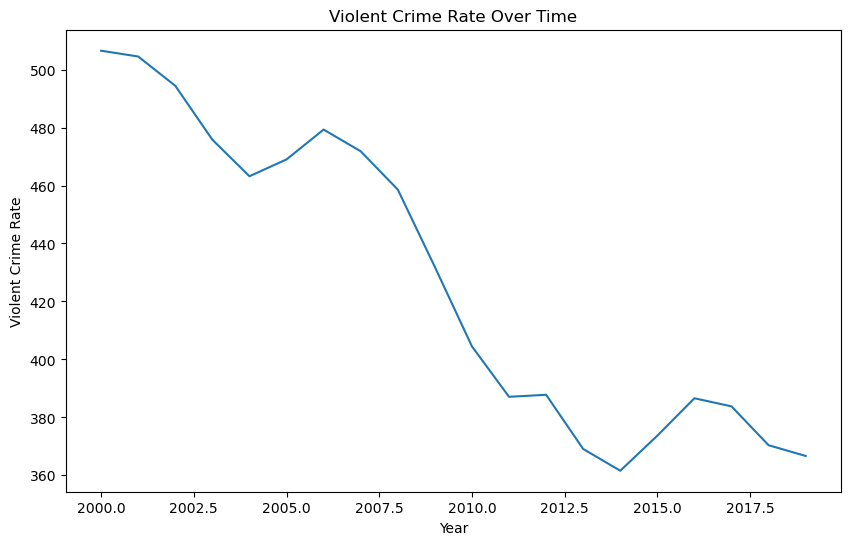

In [178]:
# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(crime_data['Year'], crime_data['Violent Crime Rate'])
ax.set_xlabel('Year')
ax.set_ylabel('Violent Crime Rate')
ax.set_title('Violent Crime Rate Over Time')


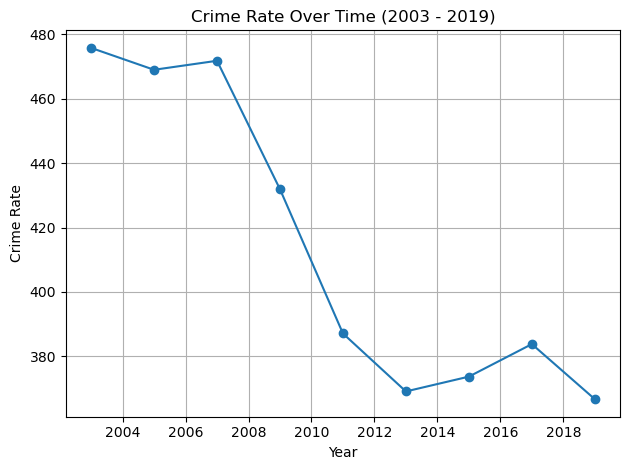

In [189]:
# Lets only include the selected years
years_to_plot = [2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019]
filtered_crime_data = crime_data[crime_data['Year'].isin(years_to_plot)]

# Plot the data
plt.plot(filtered_crime_data['Year'], filtered_crime_data['Violent Crime Rate'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Crime Rate')
plt.title('Crime Rate Over Time (2003 - 2019)')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


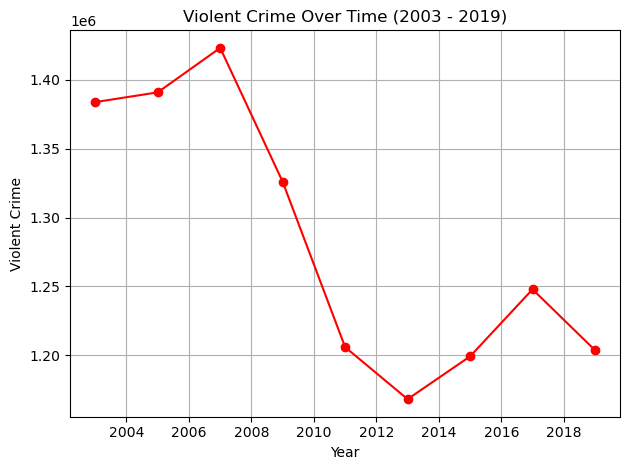

In [190]:
# Lets only include the selected years
years_to_plot = [2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019]
filtered_crime_data = crime_data[crime_data['Year'].isin(years_to_plot)]

# Plot the data
plt.plot(filtered_crime_data['Year'], filtered_crime_data['Violent Crime'], color = 'red', marker = 'o', linestyle = '-')
plt.xlabel('Year')
plt.ylabel('Violent Crime')
plt.title('Violent Crime Over Time (2003 - 2019)')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


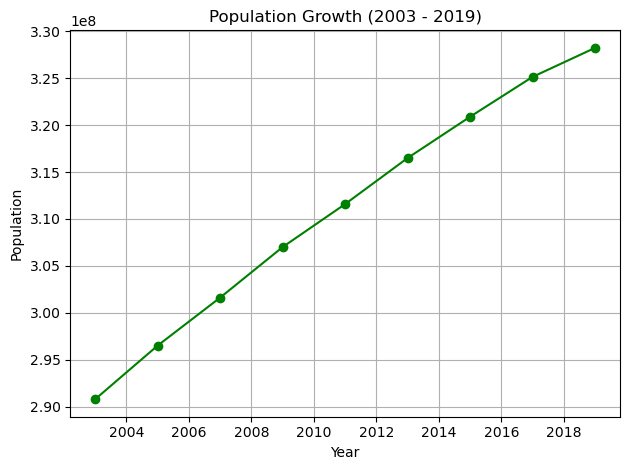

In [191]:
# Lets only include the selected years
years_to_plot = [2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019]
filtered_crime_data = crime_data[crime_data['Year'].isin(years_to_plot)]

# Plot the data
plt.plot(filtered_crime_data['Year'], filtered_crime_data['Population'], color = 'green', marker = 'o', linestyle = '-')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Growth (2003 - 2019)')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [205]:
# print(crime_data.to_string(index=False, justify='center'))

tabled_crime_data = crime_data.style.set_properties(**{'text-align': 'center'})\
                     .set_table_styles([{'selector': 'th', 'props': [('font-size', '14px')]}])\
                     .set_caption('United States Violent Crime Table')

# Print the table
tabled_crime_data

,Year,Population,Violent Crime,Violent Crime Rate
3,2000,281421906,1425486,506.500000
4,2001,285317559,1439480,504.500000
5,2002,287973924,1423677,494.400000
6,2003,290788976,1383676,475.800000
7,2004,293656842,1360088,463.200000
8,2005,296507061,1390745,469.000000
9,2006,299398484,1435123,479.300000
10,2007,301621157,1422970,471.800000
11,2008,304059724,1394461,458.600000
12,2009,307006550,1325896,431.900000
